In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import scipy as sp
import cv2 as cv
path = '../Imagens/'

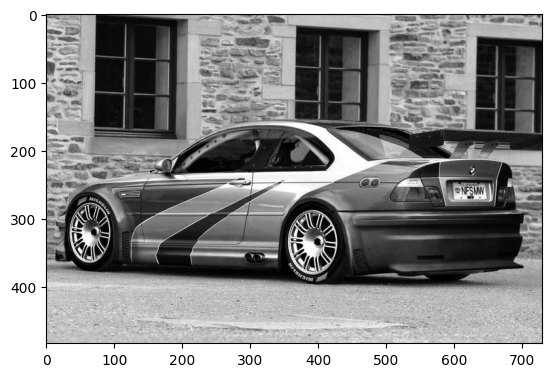

In [4]:
#Ler imagem
imfile = path + 'm3gtr.jpg'
img = cv.imread(imfile,0)
plt.imshow(img, cmap = 'gray')

1. Obtendo a transformada rápida de Fourier

In [5]:
F = np.fft.fft2(img) 
fr = F.real
fj = F.imag

images = np.array([fr,fj,np.abs(F)]) #separaçao em real, imaginario e absoluto
title = ['real', 'imaginária', 'módulo']

2. Apresentando as imagens Re{F(u,v)}, Im{F(u,v)} e |F(u,v)| e mostrando imagens com e sem o fftshift

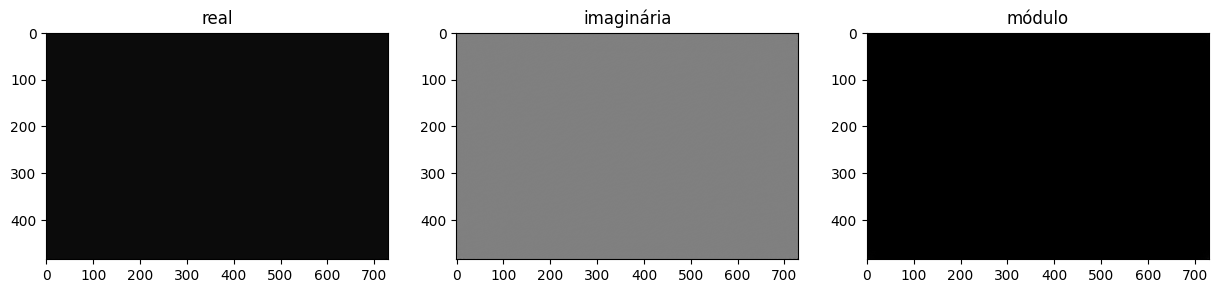

In [6]:
#plot sem fftshift
_, ax = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
for i in range(len(images)):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(title[i])
plt.show()

In [7]:
fshift = np.fft.fftshift(F) #minha imagem no dominio da frequencia

fshiftr = fshift.real
fshiftj = fshift.imag

imagesS = np.array([fshiftr,fshiftj,np.abs(fshift)]) #separaçao em real, imaginario e absoluto
titleS = ['real', 'imaginária', 'módulo']

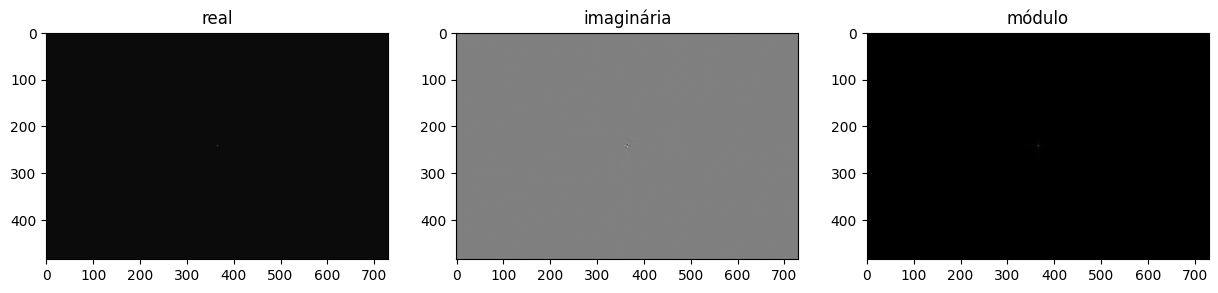

In [8]:
#plot com fftshift
_, ax = plt.subplots(1, len(imagesS), figsize=(5 * len(images), 5))
for i in range(len(imagesS)):
    ax[i].imshow(imagesS[i], cmap='gray')
    ax[i].set_title(title[i])
plt.show()

3. Efetuando o escalonamento de |F(u,v)|

In [9]:
#escalonando

escalonado_sem_shift= np.log1p(np.abs(F))
escalonado_com_shift = np.log1p(np.abs(fshift))

result = np.array([escalonado_sem_shift, escalonado_com_shift])
titleR = ['sem shift', 'com shift']

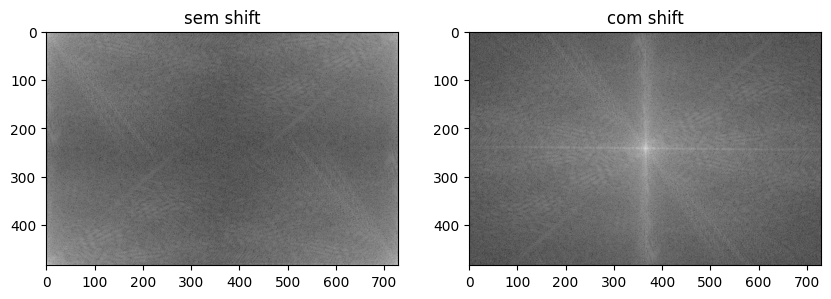

In [10]:
#plot com e sem fftshift
_, ax = plt.subplots(1, len(result), figsize=(5 * len(result), 5))
for i in range(len(result)):
    ax[i].imshow(result[i], cmap='gray')
    ax[i].set_title(titleR[i])
plt.show()

In [11]:
#centro da imagem
rows, cols = img.shape
cent_row, cent_col = int(rows/2) , int(cols/2)
print(cent_col, cent_row)

365 242


4. Filtro passa-baixas

In [12]:
#filtro passa baixa
passa_baixa_Mask = np.zeros((rows,cols), np.uint8)                              #mascara de zeros nas dimensoes da imagem
passa_baixa_Mask[cent_row - 50:cent_row + 50, cent_col - 50:cent_col + 50] = 1  #setando trecho especificado como branco

#desfazendo os passos anteriores
filtro_passa_baixa = fshift * passa_baixa_Mask                  #filtro
imagem_inversa_shift = np.fft.ifftshift(filtro_passa_baixa)     #desfazendo shift
imagem_inversa_fourrier = np.fft.ifft2(imagem_inversa_shift)    #desfazendo fourrier
imagem_original = np.real(imagem_inversa_fourrier)              #tentativa de voltar a imagem original 

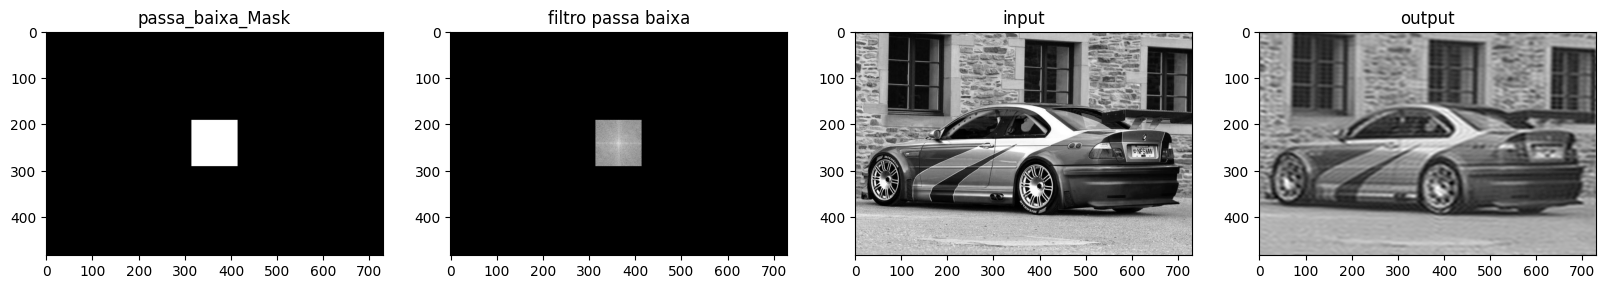

In [13]:
Result_passa_baixa = np.array([passa_baixa_Mask, (escalonado_com_shift * passa_baixa_Mask), img, imagem_original])
Title = ['passa_baixa_Mask','filtro passa baixa', 'input', 'output']

_, ax = plt.subplots(1, len(Result_passa_baixa), figsize=(5 * len(Result_passa_baixa), 5))
for i in range(len(Result_passa_baixa)):
    ax[i].imshow(Result_passa_baixa[i], cmap='gray')
    ax[i].set_title(Title[i])
plt.show()

5. Filtro passa-altas

In [14]:
#filtro passas alta
passa_alta_Mask = np.ones((rows,cols),np.uint8)                                 #mascara de Ums nas dimensoes da imagem
passa_alta_Mask[cent_row - 50:cent_row + 50, cent_col - 50:cent_col + 50] = 0   #setando trecho especificado como preto

filtro_passa_alta = fshift * passa_alta_Mask                    #filtro
imagem_inversa_shift = np.fft.ifftshift(filtro_passa_alta)      #desfazendo shift
imagem_inversa_fourrier = np.fft.ifft2(imagem_inversa_shift)    #desfazendo fourrier
imagem_original = np.real(imagem_inversa_fourrier)              #tentativa de voltar a imagem original 

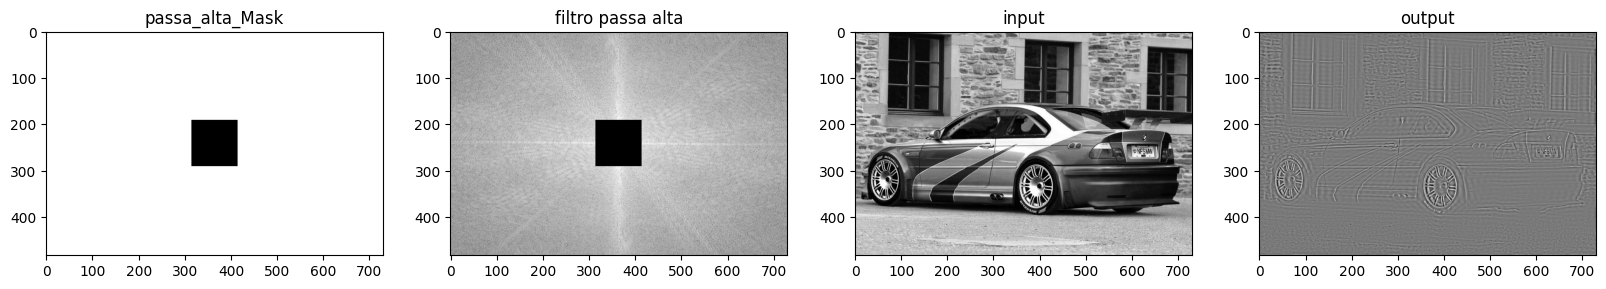

In [15]:
Result_passa_alta = np.array([passa_alta_Mask, (escalonado_com_shift * passa_alta_Mask), img, imagem_original])
Title = ['passa_alta_Mask','filtro passa alta', 'input', 'output']

_, ax = plt.subplots(1, len(Result_passa_alta), figsize=(5 * len(Result_passa_alta), 5))
for i in range(len(Result_passa_alta)):
    ax[i].imshow(Result_passa_alta[i], cmap='gray')
    ax[i].set_title(Title[i])
plt.show()